**Nama : Priskila Ayunda Pramata**

**Kelas : Alan Turing**

# Student Activity
Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

Tugas Anda:
- Tentukan langkah text pre-processing yang tepat untuk dataset di atas.
- Gunakan range `n_gram` yang berbeda. Amati apa perbedaannya.
- Menurut Anda, apakah `term` yang dihasilkan (`X_kbest_features`) pada feature selection sudah memiliki informasi yang relevan?

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam melakukan text pre-processing dan feature engineering.

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa

Batas pengumpulan maksimal: Jumat, 1 April 2022

# Case Study: SMS Spam Classification

Langkah-langkha yang diperlukan:
1. Akuisisi data
2. Text Preprocessing
  1. Case folding
  2. Word Normalization
  3. Stopword removal
  4. Stemming
3. Feature Engineering
  1. Bag of Words
  2. TF-IDF
  3. Feature Selection - Chi Square
4. Modelling # coming soon
5. Evaluasi # coming soon
6. Deployment # coming soon

# SETUP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!pip -q install sastrawi

     |████████████████████████████████| 209 kB 8.6 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import joblib
# Untuk mempermudah kita dalam menyimpan objek agar dapat kita gunakan untuk pemodelan maupun deployment

In [ ]:
# Buat folder pada Google Drive untuk eksperimen
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Pindahkan direktori ke folder eksperimen
%cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


# Data Acquisition

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/20191002-reviews.csv')
data.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


In [ ]:
# Tentukan kolom yang digunakan
data_review = data[['reviewContent','rating']]
data_review.head()

,reviewContent,rating
0,bagus mantap dah sesui pesanan,5
1,"Bagus, sesuai foto",4
2,okkkkk mantaaaaaaapppp ... goood,5
3,bagus sesuai,4
4,NaN,5


In [ ]:
data_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewContent  107029 non-null  object
 1   rating         203787 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
data_review.shape

(203787, 2)

In [ ]:
# Cek apakah ada NaN
data_review.isnull().values.any()

True

In [ ]:
# Metode 2: Hapus baris yang mengandung NaN values
drop_data_review = data_review.dropna()
drop_data_review

,reviewContent,rating
0,bagus mantap dah sesui pesanan,5
1,"Bagus, sesuai foto",4
2,okkkkk mantaaaaaaapppp ... goood,5
3,bagus sesuai,4
7,bima,1
...,...,...
203780,Wkwkwk,5
203781,seller incapable to keep his product page clea...,1
203782,barang bagus dengan harga kompetitif,5
203785,Ok.thank lazada Pagi order sore barang nyampe ...,3


In [ ]:
# Cek apakah ada NaN
drop_data_review.isnull().values.any()

False

In [ ]:
drop_data_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107029 entries, 0 to 203786
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewContent  107029 non-null  object
 1   rating         107029 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [ ]:
# Pilih beberapa baris saja yang digunakan
# Gunakan semampu komputasi teman-teman
drop_data_review.iloc[:5000] 

,reviewContent,rating
0,bagus mantap dah sesui pesanan,5
1,"Bagus, sesuai foto",4
2,okkkkk mantaaaaaaapppp ... goood,5
3,bagus sesuai,4
7,bima,1
...,...,...
10224,"Barang sesuai dengan deskripsi, bonus sesuai d...",5
10225,Thanks to Lazada. Barangnya sesuai pesanan. Aq...,5
10226,"Barang sampai di tujuan dengan cepat, packing ...",5
10227,sejauh ini bagus tpi belo dala jagka waktu yan...,3


In [ ]:
!gdown --id 1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF

Downloading...
From: https://drive.google.com/uc?id=1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF
To: /content/gdrive/MyDrive/Colab Notebooks/20191002-reviews.csv
100% 30.0M/30.0M [00:00<00:00, 45.0MB/s]


In [ ]:
print('Total Review Content:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [1] sangat tidak puas\t:', data[data.rating == 1].shape[0], 'data')
print('-- [2] tidak puas\t:', data[data.rating == 2].shape[0], 'data\n')
print('-- [3] cukup puas\t:', data[data.rating == 3].shape[0], 'data\n')
print('-- [4] puas\t:', data[data.rating == 4].shape[0], 'data\n')
print('-- [5] sangat puas\t:', data[data.rating == 5].shape[0], 'data\n')

Total Review Content: 203787 data

terdiri dari (label):
-- [1] sangat tidak puas	: 9749 data
-- [2] tidak puas	: 3382 data

-- [3] cukup puas	: 7073 data

-- [4] puas	: 17567 data

-- [5] sangat puas	: 166016 data



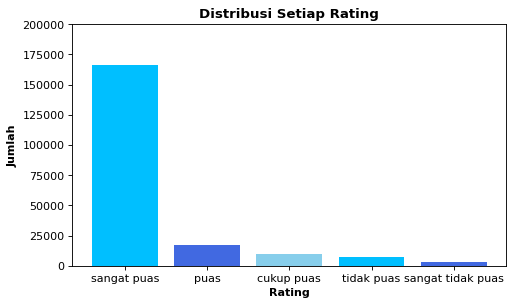

In [ ]:
height = data['rating'].value_counts()
labels = ('sangat puas', 'puas', 'cukup puas', 'tidak puas', 'sangat tidak puas')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,200000)
plt.title('Distribusi Setiap Rating', fontweight='bold')
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

# Text Processing

# Case Folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                   # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = data_review['reviewContent'].iloc[9]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Pesan rabu sore,minggu sore sampe,,barang sesuai specs mantab,tks lazada
Case folding	:  pesan rabu soreminggu sore sampebarang sesuai specs mantabtks lazada


# Word Normalization

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-04-03 01:45:26--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.2’

key_norm.csv.2      100%[===================>]  79.07K  --.-KB/s    in 0.01s   

2022-04-03 01:45:26 (6.45 MB/s) - ‘key_norm.csv.2’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

# Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['barang', 'pengiriman', 'pesan']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data_review['reviewContent'].iloc[9]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Pesan rabu sore,minggu sore sampe,,barang sesuai specs mantab,tks lazada
Case folding		:  pesan rabu soreminggu sore sampebarang sesuai specs mantabtks lazada
Stopword removal	:  rabu soreminggu sore sampebarang sesuai specs mantabtks lazada


# Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data_review['reviewContent'].iloc[17]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  ok barang sampai dengan Baik.. smoga terus di pertahankan...
Case folding		:  ok barang sampai dengan baik smoga terus di pertahankan
Stopword removal	:  ok smoga pertahankan
Stemming		:  ok smoga tahan


# Text Pocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
data_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewContent  107029 non-null  object
 1   rating         203787 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
%%time
data['clean_teks'] = drop_data_review['reviewContent'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 1h 16min 26s, sys: 33.5 s, total: 1h 16min 59s
Wall time: 1h 16min 30s


In [ ]:
data

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate,clean_teks
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02,bagus mantap sesui pesan
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02,bagus sesuai foto
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02,okkkkk mantaaaaaaapppp goood
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02,bagus sesuai
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203782,9467899,shop-televisi-digital,Isharyanto S.,5,NaN,murah,barang bagus dengan harga kompetitif,6,6,0,True,24.63,22 Nov 2016,desktop,2019-10-02,bagus harga kompetitif
203783,9467899,shop-televisi-digital,FIRLY B.,3,NaN,barang bagus dan sesuai pesanan,NaN,0,0,0,True,14.01,10 Apr 2018,androidApp,2019-10-02,NaN
203784,9548087,shop-televisi-digital,soni s.,5,NaN,NaN,NaN,0,0,0,True,15.63,04 Jan 2018,androidApp,2019-10-02,NaN
203785,9548767,shop-televisi-digital,Saidhusin H.,3,NaN,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,0,0,0,True,19.48,15 Nov 2016,mobile-app,2019-10-02,okthank lazada pagi order sore packing okebara...


In [ ]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
data.to_csv('clean_data.csv')

In [ ]:
data_review

,reviewContent,rating
0,bagus mantap dah sesui pesanan,5
1,"Bagus, sesuai foto",4
2,okkkkk mantaaaaaaapppp ... goood,5
3,bagus sesuai,4
4,NaN,5
...,...,...
203782,barang bagus dengan harga kompetitif,5
203783,NaN,3
203784,NaN,5
203785,Ok.thank lazada Pagi order sore barang nyampe ...,3
